Face Detection Using OpenCV

In a previous notebook, I used OpenCV to run facial detection, using 2 freely availible and appropriately licensed images online. We used a pretrained model but despite optimisation, the results wern't good. Today I try the same thing, using a CNN

First, as always, we read in the data and import libraries

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.patches import Rectangle, Circle #MTCNN does not have this built in, unlike CV2
!pip install mtcnn # needs installing, not present in colabs
from mtcnn.mtcnn import MTCNN

In [7]:
#first get 2 images with CC licences, a clear one, and a faded sepia one
!wget https://upload.wikimedia.org/wikipedia/commons/9/91/UAE_Team_Colombia_2020.jpg
!wget https://cdn2.picryl.com/photo/1923/12/31/first-lfls-team-1923-2b04bc-640.jpg
#This default saves in /content/sample_data

--2022-05-09 11:47:04--  https://upload.wikimedia.org/wikipedia/commons/9/91/UAE_Team_Colombia_2020.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 198.35.26.112, 2620:0:863:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|198.35.26.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 182315 (178K) [image/jpeg]
Saving to: ‘UAE_Team_Colombia_2020.jpg.1’

UAE_Team_Colombia_2 100%[===================>] 178.04K  --.-KB/s    in 0.05s   

2022-05-09 11:47:04 (3.46 MB/s) - ‘UAE_Team_Colombia_2020.jpg.1’ saved [182315/182315]

--2022-05-09 11:47:04--  https://cdn2.picryl.com/photo/1923/12/31/first-lfls-team-1923-2b04bc-640.jpg
Resolving cdn2.picryl.com (cdn2.picryl.com)... 104.26.5.111, 104.26.4.111, 172.67.73.118, ...
Connecting to cdn2.picryl.com (cdn2.picryl.com)|104.26.5.111|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48682 (48K) [image/jpeg]
Saving to: ‘first-lfls-team-1923-2b04bc-640.jpg.1’

first-lfls

We start with Face detection. The built in read and display functions of openCV are not present, so we run through matplotlib's imread and imshow.
The classifier is specifically for faces, so the model is pretrained (ie it has default weights). Once the images are loaded, we run them through the classifier and we assess the bounding boxes around the images to see how well the classifier did

(-0.5, 639.5, 493.5, -0.5)

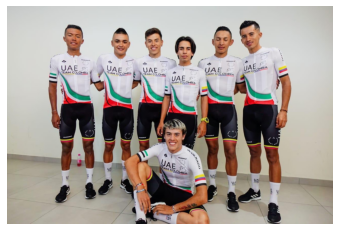

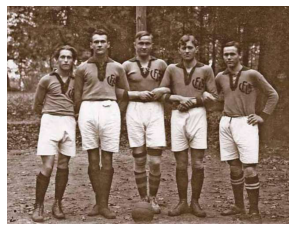

In [9]:
# We load both the images
img1 = plt.imread('UAE_Team_Colombia_2020.jpg')
img2 = plt.imread('first-lfls-team-1923-2b04bc-640.jpg')

#And display them
plt.figure()
plt.imshow(img1)
plt.axis('off')
plt.figure()
plt.imshow(img2)
plt.axis('off')

In [13]:
# create the classifier
clf = MTCNN()
# detect the faces
bboxes1 = clf.detect_faces(img1)

print("Image 1:")
for b in bboxes1:
	print(b)

bboxes2 = clf.detect_faces(img2)
print("Image 2:")
for b in bboxes2:
	print(b)

Image 1:
{'box': [918, 82, 69, 86], 'confidence': 0.9999972581863403, 'keypoints': {'left_eye': (932, 120), 'right_eye': (960, 112), 'nose': (945, 134), 'mouth_left': (940, 148), 'mouth_right': (967, 141)}}
{'box': [668, 136, 57, 81], 'confidence': 0.9999794960021973, 'keypoints': {'left_eye': (686, 168), 'right_eye': (711, 169), 'nose': (698, 182), 'mouth_left': (685, 197), 'mouth_right': (709, 198)}}
{'box': [415, 107, 61, 81], 'confidence': 0.9999480247497559, 'keypoints': {'left_eye': (434, 140), 'right_eye': (462, 142), 'nose': (448, 157), 'mouth_left': (433, 166), 'mouth_right': (459, 168)}}
{'box': [548, 110, 56, 74], 'confidence': 0.999944806098938, 'keypoints': {'left_eye': (562, 140), 'right_eye': (587, 137), 'nose': (575, 153), 'mouth_left': (564, 166), 'mouth_right': (590, 164)}}
{'box': [231, 90, 60, 78], 'confidence': 0.9998952150344849, 'keypoints': {'left_eye': (248, 116), 'right_eye': (278, 121), 'nose': (263, 130), 'mouth_left': (247, 146), 'mouth_right': (274, 150)}}

In [14]:
#A less verbose sumary
print("Faces detected in image 1:", len(bboxes1))
print("Faces detected in image 2:", len(bboxes2))

Faces detected in image 1: 7
Faces detected in image 2: 6


Now we

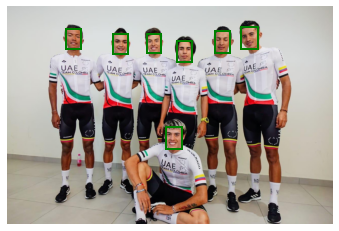

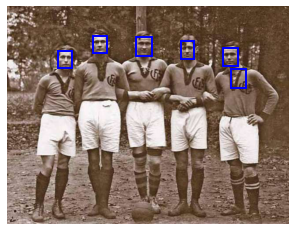

In [32]:
figure, ax = plt.subplots(1)
plt.imshow(img1)
plt.axis('off')
for b in bboxes1:
  x, y, width, height = b['box'] # extract coordinates from each box, one at a time
  rect = Rectangle((x, y), width, height, fill=False, color='green', linewidth = '2') #uses coords to make a rectangle
  ax.add_patch(rect)
plt.show()

#and an alternative way of doing things, for image 2, just because :)
plt.figure()
plt.imshow(img2)
plt.axis('off')
ax = plt.gca() #has to be used in the abscence of fig,ax
for b in bboxes2:
  x, y, width, height = b['box'] # extract coordinates from each box, one at a time
  rect = Rectangle((x, y), width, height, fill=False, color='blue', linewidth = '2') #uses coords to make a rectangle
  ax.add_patch(rect)
plt.show()


So on the first image the result is excellent. Not so much on the second image. There's that 'extra face' we noted earlier. As it is based on a NN architecture, there is a limit to the tuning we can do (parameters include image_size=, margin=, keep_all=False, min_face_size=)

But lets focus on what worked.
There's also options with MTCNN to pinpoint features, as the classifier is supposed to detect eyes, nose and the right and left boundaries of the lips/smile, again saved in the bboxes disctionary but this time in another dictionary called 'keypoints'. Lets see if this works. We have to copy some of the code from before. I'm just going to do it for image 1

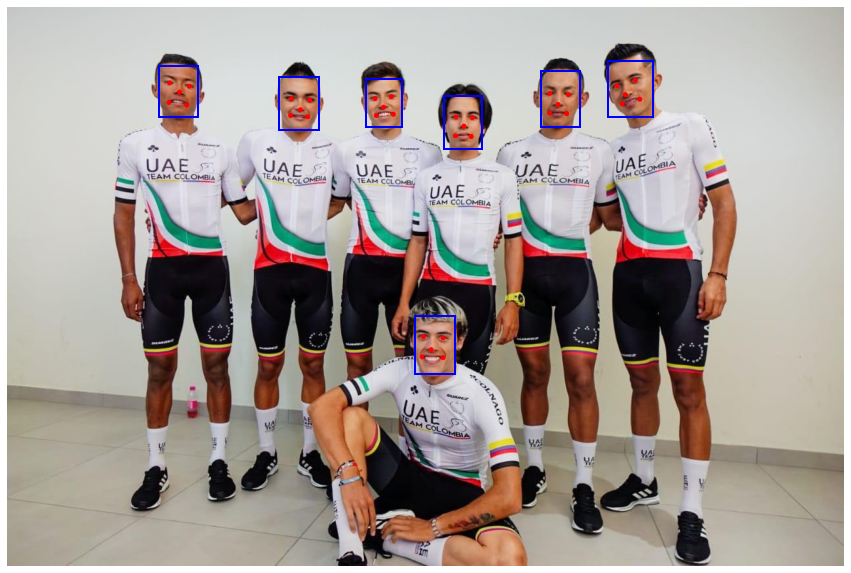

In [35]:
plt.figure(figsize = (15,12))
plt.imshow(img1)
plt.axis('off')
ax = plt.gca() #has to be used in the abscence of fig,ax
for b in bboxes1:
  x, y, width, height = b['box'] # extract coordinates from each box, one at a time
  rect = Rectangle((x, y), width, height, fill=False, color='blue', linewidth = '2') #uses coords to make a rectangle
  ax.add_patch(rect)
  for key, value in b['keypoints'].items():
			circ = Circle(value, radius=3, color='red') #The clf only gives 1 coordinate per anatomy. A circle is easier to plot with 1 coord
			ax.add_patch(circ)
plt.show()

Not too Shabby! So lastly, lets say we need these faces for another task, this is how we can slice the image array, based on the coordinates we already know, to retrieve the images, and save them if needed

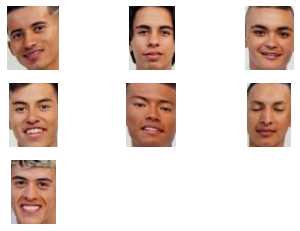

In [42]:
#Example only using image 1, but the same applies for image2 [we'll just get one non-face unless we adjust the code]
i = 1
for b in bboxes1:
  x, y, width, height = b['box'] # extract coordinates from each box, one at a time
  plt.subplot(3,3,i) # note this is subplot, not subplots
  plt.axis('off')
  plt.imshow(img1[y:(y + height), x:(x + width)])
  #Could also save this image if wanted in the same way, using imsave
  i += 1
plt.show()

Its only now that I realised one of these guys had their eyes closed!
Thats it for now. We can see openCV vs MTCNN have pros and cons. As always, you often need to work with a few libraries to find the best fit for your data